In [1]:
import pandas as pd

In [2]:
from datetime import datetime
from datetime import timedelta

In [3]:
ld = pd.read_csv("log_data.csv")

In [4]:
ld['timestamp'] = pd.to_datetime(ld['timestamp'])

In [6]:
applog = pd.read_csv("applyevent.csv")

In [9]:
alllog = pd.concat([dat,applog],axis = 0)

In [13]:
alllog[['user_id','event','timestamp']].sort_values(by=['user_id','timestamp'],ascending = True).to_csv('alllog.csv')

In [5]:
dat = ld[['user_id','event','timestamp']].sort_values(by=['user_id','timestamp'],ascending = True)

In [9]:
tim1=list(dat['timestamp'])

In [12]:
alllog

,user_id,event,timestamp,Unnamed: 0,index
11709372,1,GetCreditInfo,2022-05-03 14:52:28,NaN,NaN
11709374,1,GetCreditInfo,2022-05-03 14:52:35,NaN,NaN
2451691,1,UseLoanManage,2022-06-16 23:58:41,NaN,NaN
2451693,1,Login,2022-06-16 23:58:41,NaN,NaN
7071607,1,GetCreditInfo,2022-06-16 23:58:42,NaN,NaN
...,...,...,...,...,...
728879,457469,NotApplied,2022-05-29 01:06:33,728879.0,3520028.0
728880,770735,NotApplied,2022-05-29 19:14:07,728880.0,3520220.0
728881,140196,NotApplied,2022-05-29 21:44:03,728881.0,3520203.0
728882,694421,NotApplied,2022-05-29 02:22:57,728882.0,3520142.0


In [10]:
tim3 = []
for i in range(len(tim1)-1):
    tim3.append(tim1[i+1]-tim1[i])
tim3.append(timedelta(0))

In [11]:
dat['duration'] = tim3

In [12]:
newlog = dat[dat['event'].isin(['OpenApp','GetCreditInfo','UseLoanManage','UsePrepayCalc','ViewLoanApplyIntro','StartLoanApply','CompleteIDCertification','UseDSRCalc'])]

In [13]:
newnewlog = newlog.drop(newlog[(newlog['event'].isin(['GetCreditInfo','UseLoanManage','UsePrepayCalc','UseDSRCalc'])) & (newlog['duration'] < timedelta(seconds = 5))].index)

In [98]:
newnewlog

,user_id,event,timestamp,duration
2451691,1,UseLoanManage,2022-06-16 23:58:41,0 days 00:00:01
7071607,1,GetCreditInfo,2022-06-16 23:58:42,-26 days +16:41:07
10428909,7,GetCreditInfo,2022-05-22 16:39:49,-1 days +06:58:09
9627370,9,GetCreditInfo,2022-05-21 23:43:52,-59 days +11:10:07
13238918,11,GetCreditInfo,2022-03-24 10:54:07,0 days 00:00:01
...,...,...,...,...
10628979,879696,GetCreditInfo,2022-03-14 05:35:43,0 days 00:00:04
7298670,879696,ViewLoanApplyIntro,2022-03-14 05:37:55,0 days 00:00:21
7298671,879696,CompleteIDCertification,2022-03-14 05:38:16,0 days 00:03:58
8248082,879698,ViewLoanApplyIntro,2022-05-24 22:33:32,0 days 00:00:00


In [14]:
newnewlog['code'] = newnewlog['event'].map({'OpenApp':'Open','GetCreditInfo':"Credit",'UseLoanManage':"Manage",'UsePrepayCalc':"Prepay",'ViewLoanApplyIntro':1,'StartLoanApply':2,'CompleteIDCertification':3,'UseDSRCalc':"DSR"})

In [15]:
dursign = list(newnewlog.duration.apply(lambda x: True if x >= timedelta(seconds=0) else False))

In [16]:
codelist = list(newnewlog.code)

In [17]:
survlist =[]
for i in range(len(dursign)-1):
    if (len(str(codelist[i])) == 1) and (len(str(codelist[i+1])) == 1) and (dursign[i]):
        if (int(codelist[i+1]) > int(codelist[i])):
            survlist.append(True)
        else:
            survlist.append(False)
    else:
        survlist.append(False)
survlist.append(True)

In [18]:
newnewlog['surv'] = survlist

In [19]:
newnewnewlog = newnewlog.drop(newnewlog[newnewlog['surv']].index)

In [ ]:
# 행동에 관련 없는 것 삭제
# 0.7초 이하 머무른 것은 삭제
# 대출 조회과정에 있는 것은 최종 단계에 대한 숫자 나타내기

# endloanapply를 다 삭제?


#클러스터링 - 횟수, 빈도, 머무는 시간? 과거 수상작에서 사용한 방식?

In [121]:
newnewnewlog

,user_id,event,timestamp,duration,code,surv
2451691,1,UseLoanManage,2022-06-16 23:58:41,0 days 00:00:01,Manage,False
7071607,1,GetCreditInfo,2022-06-16 23:58:42,-26 days +16:41:07,Credit,False
10428909,7,GetCreditInfo,2022-05-22 16:39:49,-1 days +06:58:09,Credit,False
9627370,9,GetCreditInfo,2022-05-21 23:43:52,-59 days +11:10:07,Credit,False
13238918,11,GetCreditInfo,2022-03-24 10:54:07,0 days 00:00:01,Credit,False
...,...,...,...,...,...,...
6068504,879695,StartLoanApply,2022-05-27 12:48:32,0 days 00:00:00,2,False
6068512,879695,CompleteIDCertification,2022-05-27 12:48:51,0 days 00:02:32,3,False
7298666,879696,UseLoanManage,2022-03-14 05:35:41,0 days 00:00:02,Manage,False
10628979,879696,GetCreditInfo,2022-03-14 05:35:43,0 days 00:00:04,Credit,False


In [20]:
onehot = pd.concat([newnewnewlog['user_id'], pd.get_dummies(newnewnewlog.code, prefix='code')],axis=1)

In [21]:
out = onehot.groupby('user_id').sum()
out.to_csv("out.csv")

In [2]:
out = pd.read_csv("out.csv")

In [3]:
out['code_1+2'] = out['code_1'] + out['code_2']

In [4]:
out = out.drop(['code_1','code_2'],axis =1)

In [18]:
out = out.drop(['user_id'],axis =1)

In [12]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.3,min_samples=5)
predict = pd.DataFrame(model.fit_predict(out))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([out,predict],axis=1)

r.groupby('predict').count()


        user_id  code_3  code_Credit  code_DSR  code_Manage  code_Open  \
0             1     0.0          2.0       0.0          0.0        0.0   
1             9     0.0          2.0       0.0          0.0        0.0   
2            11     4.0          3.0       0.0          5.0        5.0   
3            12    15.0          4.0       0.0          0.0       15.0   
4            17     2.0          1.0       0.0          1.0        3.0   
...         ...     ...          ...       ...          ...        ...   
539016   879693     6.0          1.0       0.0          3.0        9.0   
539017   879694     1.0          0.0       0.0          0.0        0.0   
539018   879695     1.0          0.0       0.0          0.0        0.0   
539019   879696     1.0          2.0       0.0          1.0        1.0   
539020   879698     0.0          0.0       0.0          0.0        1.0   

        code_Prepay  code_1+2  predict  
0               0.0       0.0       -1  
1               0.0       0.0

In [8]:
sns.pairplot(r,hue=str('predict')+1)
plt.show()

TypeError: can only concatenate str (not "int") to str

In [13]:
r.groupby('predict').count()

,user_id,code_3,code_Credit,code_DSR,code_Manage,code_Open,code_Prepay,code_1+2
predict,,,,,,,,
-1,539021,539021,539021,539021,539021,539021,539021,539021


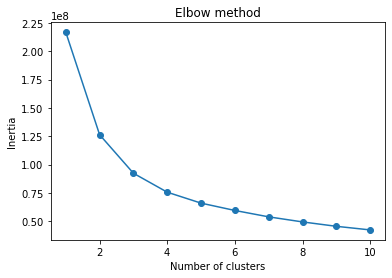

In [19]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(out)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(out)

KMeans(n_clusters=3)

In [35]:
new=out
new['pred']=kmeans.labels_

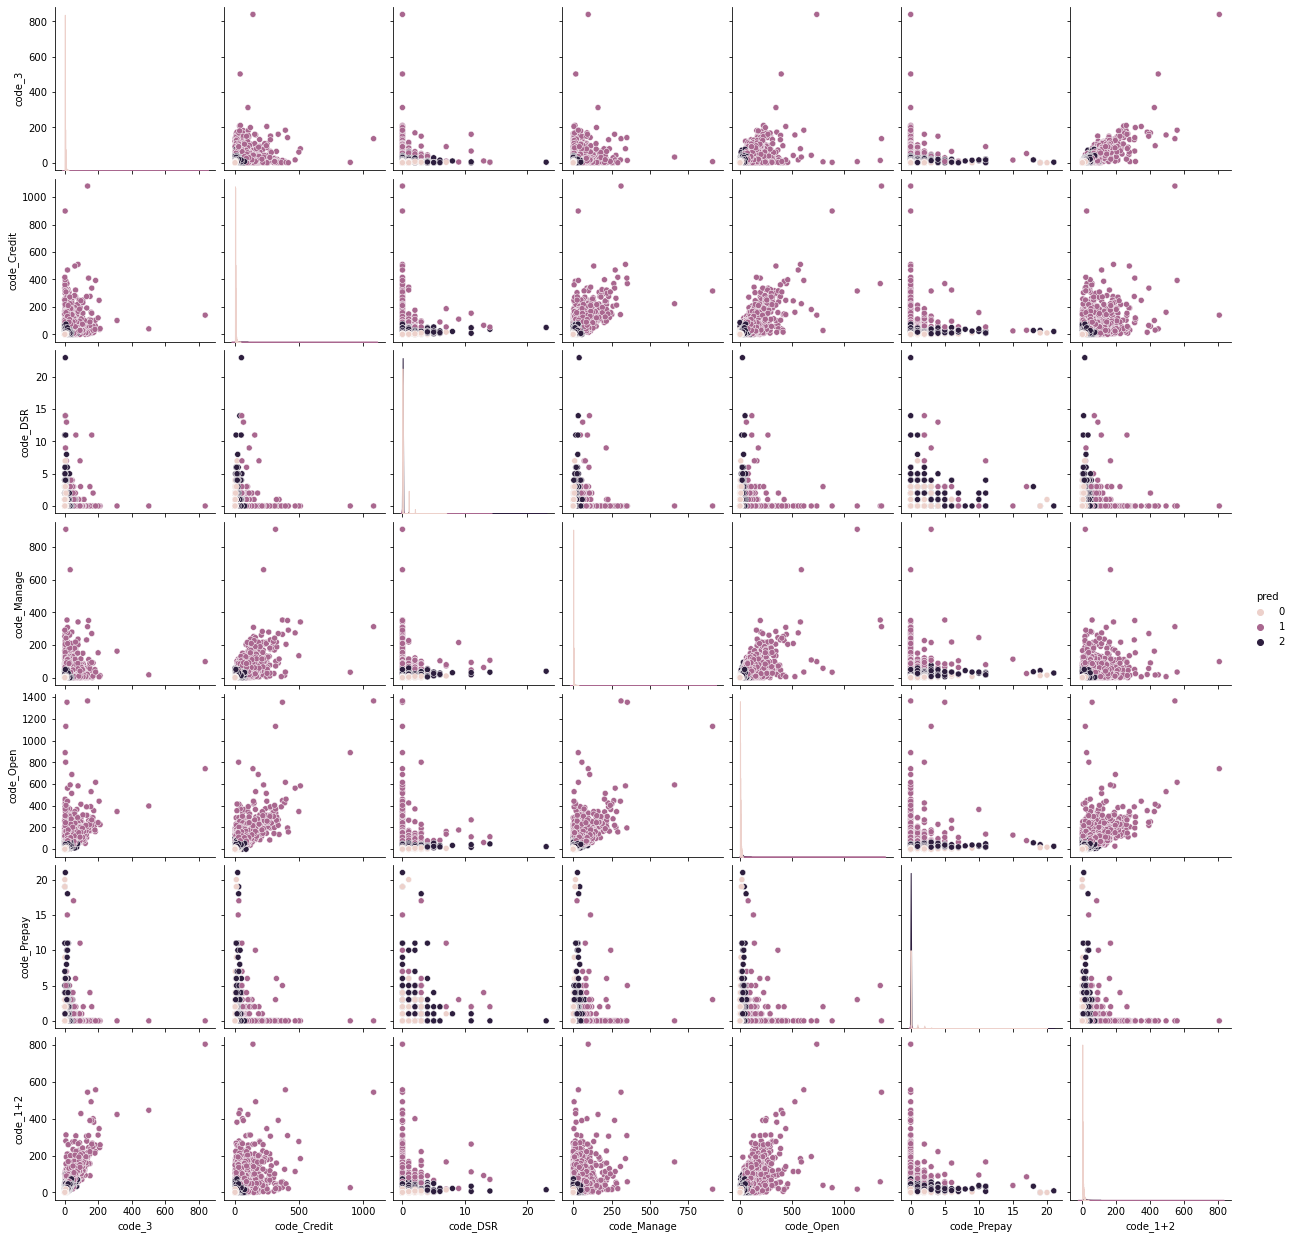

In [36]:

sns.pairplot(new,hue='pred')
plt.show()

In [28]:
len(kmeans.labels_)

539021

In [29]:
out

,code_3,code_Credit,code_DSR,code_Manage,code_Open,code_Prepay,code_1+2
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,4.0,3.0,0.0,5.0,5.0,1.0,5.0
3,15.0,4.0,0.0,0.0,15.0,0.0,16.0
4,2.0,1.0,0.0,1.0,3.0,0.0,6.0
...,...,...,...,...,...,...,...
539016,6.0,1.0,0.0,3.0,9.0,0.0,19.0
539017,1.0,0.0,0.0,0.0,0.0,0.0,1.0
539018,1.0,0.0,0.0,0.0,0.0,0.0,1.0
539019,1.0,2.0,0.0,1.0,1.0,0.0,0.0
